In [26]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA

In [42]:
with open('acc_names') as f:
    accessions = [l.strip() for l in f.readlines()]

In [43]:
kmer_counts_df = pd.read_csv('tmp.tsv', index_col=0, sep='\t', names=accessions)
kmer_pa_df = (kmer_counts_df > 0).astype('int8')

In [44]:
occup = kmer_pa_df.sum(axis=1)

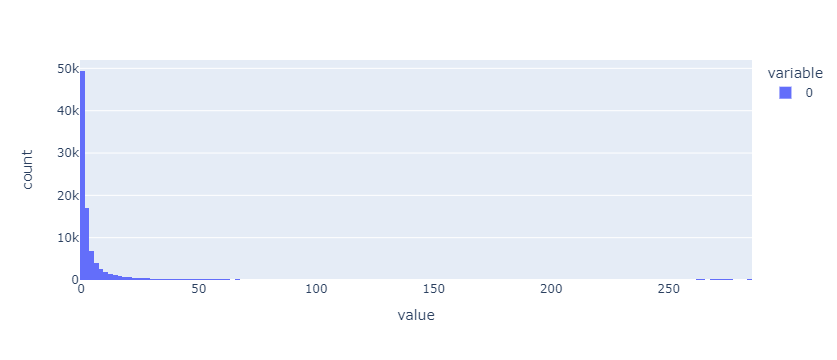

In [45]:
fig = px.histogram(occup)
fig.show()

In [37]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(kmer_pa_df.transpose())
pc_df = pd.DataFrame(pcs, columns=['PC1','PC2'])

In [46]:
acc_details_df = pd.read_csv('acc_details.tsv', sep='\t', index_col=0)
acc_details_df = acc_details_df.loc[accessions]

In [49]:
pc_df.index = accessions

In [51]:
pc_df = pd.concat([pc_df, acc_details_df], axis=1)

In [70]:
pc1_ex, pc2_ex = pca.explained_variance_ratio_
pc1_ex = round(pc1_ex * 100, 2)
pc2_ex = round(pc2_ex * 100, 2)

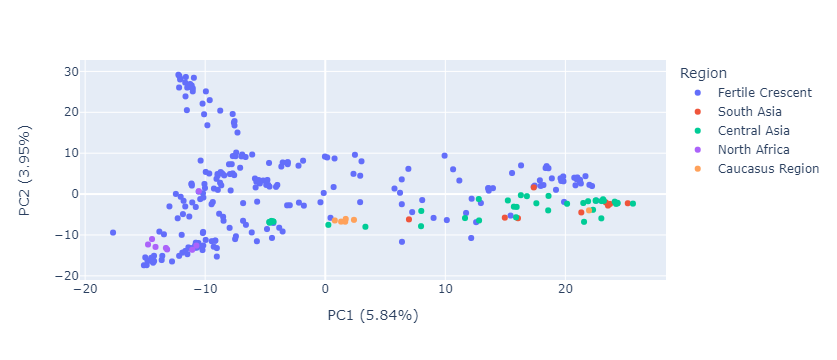

In [71]:
fig = px.scatter(pc_df, x='PC1', y='PC2', color='Region')
fig.update_xaxes(title_text='PC1 (%s%%)' % pc1_ex)
fig.update_yaxes(title_text='PC2 (%s%%)' % pc2_ex)
fig.show()

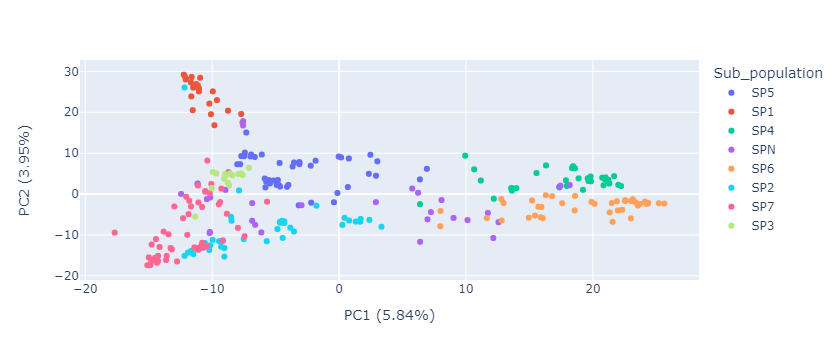

In [72]:
fig = px.scatter(pc_df, x='PC1', y='PC2', color='Sub_population')
fig.update_xaxes(title_text='PC1 (%s%%)' % pc1_ex)
fig.update_yaxes(title_text='PC2 (%s%%)' % pc2_ex)
fig.show()